In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
import re as re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('order_reviews.csv')

In [3]:
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [4]:
df.describe()

,review_score
count,100000.000000
mean,4.070890
std,1.359663
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


#### Dropping useless comlumns

In [6]:
df = df.drop(['review_id','order_id','review_comment_title','review_creation_date','review_answer_timestamp'],axis=1)
df

,review_score,review_comment_message
0,4,NaN
1,5,NaN
2,5,NaN
3,5,Recebi bem antes do prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar pela I...
...,...,...
99995,5,NaN
99996,5,"Excelente mochila, entrega super rápida. Super..."
99997,4,NaN
99998,1,Solicitei a compra de uma capa de retrovisor c...


#### Dropping all NaN's

In [7]:
df.dropna(subset = ["review_comment_message"], inplace=True)
df

,review_score,review_comment_message
3,5,Recebi bem antes do prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar pela I...
9,4,aparelho eficiente. no site a marca do aparelh...
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
15,5,"Vendedor confiável, produto ok e entrega antes..."
...,...,...
99983,5,Entregou dentro do prazo. O produto chegou em ...
99990,3,"O produto não foi enviado com NF, não existe v..."
99996,5,"Excelente mochila, entrega super rápida. Super..."
99998,1,Solicitei a compra de uma capa de retrovisor c...


/home/asha/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


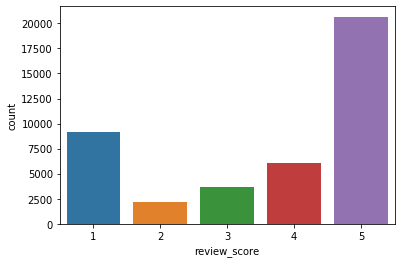

In [8]:
#count of score types
sns.countplot(df.review_score)

#### Getting reviews with numbers

In [169]:
df['contain_digits'] = 0
df

,review_score,review_comment_message,contain_digits
3,5,Recebi bem antes do prazo estipulado.,0
4,5,Parabéns lojas lannister adorei comprar pela I...,0
9,4,aparelho eficiente. no site a marca do aparelh...,0
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",0
15,5,"Vendedor confiável, produto ok e entrega antes...",0
...,...,...,...
99983,5,Entregou dentro do prazo. O produto chegou em ...,0
99990,3,"O produto não foi enviado com NF, não existe v...",0
99996,5,"Excelente mochila, entrega super rápida. Super...",0
99998,1,Solicitei a compra de uma capa de retrovisor c...,0


### Finding seperated if seperated digits exists

In [9]:
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)

In [171]:
df['digits']=df['review_comment_message'].apply(lambda x: find_number(x))
print("Extracting numbers from dataframe columns:")
df

Extracting numbers from dataframe columns:


,review_score,review_comment_message,contain_digits,digits
3,5,Recebi bem antes do prazo estipulado.,0,
4,5,Parabéns lojas lannister adorei comprar pela I...,0,
9,4,aparelho eficiente. no site a marca do aparelh...,0,3
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",0,
15,5,"Vendedor confiável, produto ok e entrega antes...",0,
...,...,...,...,...
99983,5,Entregou dentro do prazo. O produto chegou em ...,0,
99990,3,"O produto não foi enviado com NF, não existe v...",0,
99996,5,"Excelente mochila, entrega super rápida. Super...",0,
99998,1,Solicitei a compra de uma capa de retrovisor c...,0,


In [172]:
df['digits'].iloc[0]

''

In [83]:
seperated_digit_df=df[df['digits'].astype(str).str.isdigit()]

In [84]:
seperated_digit_df

,review_score,review_comment_message,contain_digits,digits
9,4,aparelho eficiente. no site a marca do aparelh...,0,3
22,5,Loja nota 10,0,10
51,1,recebi somente 1 controle Midea Split ESTILO.\...,0,1
169,1,fiz minha compra faz 30 dias e não recebi aind...,0,30
227,3,Não recomendaria esta loja nem pretendo voltar...,0,1
...,...,...,...,...
99643,3,Comprei 2 óleo de menaleuca mas recebi apenas ...,0,2
99644,5,Chegou d3ntro do prazo bem embalado tudo certi...,0,3
99682,1,O produto veio com furos errado para montagem....,0,3
99689,1,Mais de vinte três (23) dias que comprei um pr...,0,23


In [89]:
text = " ".join(review for review in seperated_digit_df.review_comment_message.astype(str))

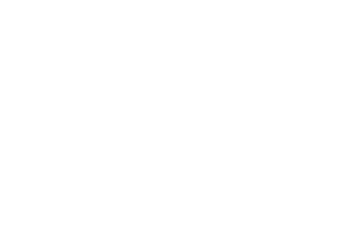

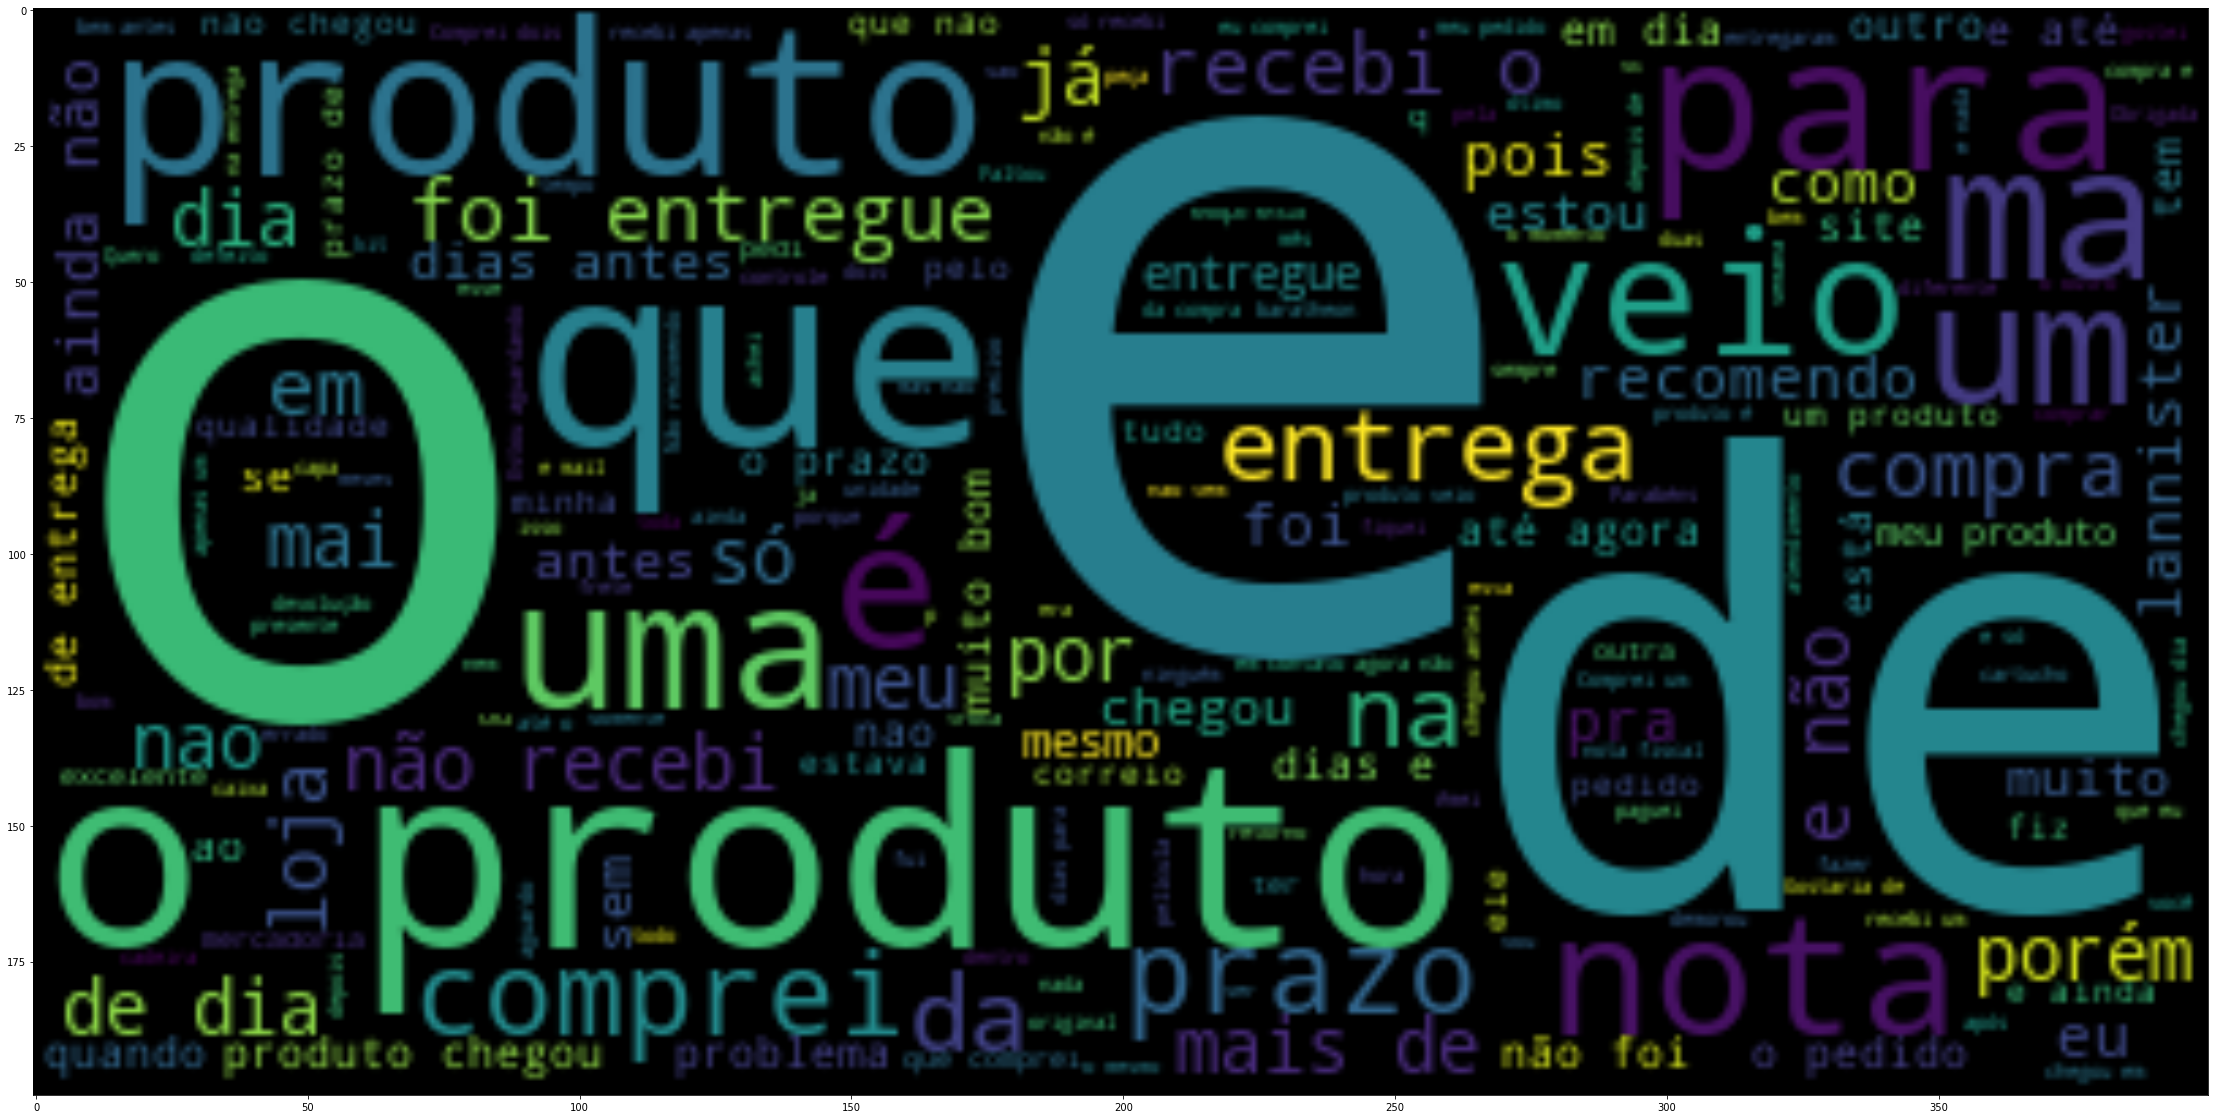

In [93]:
word = WordCloud().generate(text)
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(word, interpolation='bilinear')
plt.show()

### Find reviews with any digit in text

In [10]:
df

,review_score,review_comment_message
3,5,Recebi bem antes do prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar pela I...
9,4,aparelho eficiente. no site a marca do aparelh...
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
15,5,"Vendedor confiável, produto ok e entrega antes..."
...,...,...
99983,5,Entregou dentro do prazo. O produto chegou em ...
99990,3,"O produto não foi enviado com NF, não existe v..."
99996,5,"Excelente mochila, entrega super rápida. Super..."
99998,1,Solicitei a compra de uma capa de retrovisor c...


In [11]:
print(df["review_comment_message"].iloc[1])
print(type(df["review_comment_message"].iloc[2]))

Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa
<class 'str'>


## spacy package of portugal language doesn't recognize MONEY ent_type

In [13]:
df

,review_score,review_comment_message
3,5,Recebi bem antes do prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar pela I...
9,4,aparelho eficiente. no site a marca do aparelh...
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
15,5,"Vendedor confiável, produto ok e entrega antes..."
...,...,...
99983,5,Entregou dentro do prazo. O produto chegou em ...
99990,3,"O produto não foi enviado com NF, não existe v..."
99996,5,"Excelente mochila, entrega super rápida. Super..."
99998,1,Solicitei a compra de uma capa de retrovisor c...


In [14]:
import spacy
from spacy import displacy
from collections import Counter
from spacy.lang.pt.examples import sentences 

In [15]:
nlp = spacy.load("pt_core_news_sm")
doc = nlp(sentences[0])
test_string = doc.text
test_string=test_string+" 20bilhão"
test_string

'Apple está querendo comprar uma startup do Reino Unido por 100 milhões de dólares 20bilhão'

In [16]:
sentences[0]

'Apple está querendo comprar uma startup do Reino Unido por 100 milhões de dólares'

In [17]:
print([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(Apple, 'B', 'ORG'), (está, 'O', ''), (querendo, 'O', ''), (comprar, 'O', ''), (uma, 'O', ''), (startup, 'O', ''), (do, 'O', ''), (Reino, 'B', 'LOC'), (Unido, 'I', 'LOC'), (por, 'O', ''), (100, 'O', ''), (milhões, 'O', ''), (de, 'O', ''), (dólares, 'O', '')]


In [18]:
nlp = spacy.load("pt_core_news_sm")
doc = nlp(sentences[0]+" 20room")
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple está querendo comprar uma startup do Reino Unido por 100 milhões de dólares 20room
Apple PROPN nsubj
está AUX aux
querendo VERB ROOT
comprar VERB xcomp
uma DET det
startup NOUN obj
do ADP case
Reino PROPN nmod
Unido PROPN flat:name
por ADP case
100 NUM obl
milhões NUM flat
de ADP case
dólares NOUN nmod
20room NUM obj


In [19]:
print([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(Apple, 'B', 'ORG'), (está, 'O', ''), (querendo, 'O', ''), (comprar, 'O', ''), (uma, 'O', ''), (startup, 'O', ''), (do, 'O', ''), (Reino, 'B', 'LOC'), (Unido, 'I', 'LOC'), (por, 'O', ''), (100, 'O', ''), (milhões, 'O', ''), (de, 'O', ''), (dólares, 'O', ''), (20room, 'O', '')]


## Filtering NUMs pos_ from spacy

In [20]:
df["NUMs"] = 0
df.head(3)

,review_score,review_comment_message,NUMs
3,5,Recebi bem antes do prazo estipulado.,0
4,5,Parabéns lojas lannister adorei comprar pela I...,0
9,4,aparelho eficiente. no site a marca do aparelh...,0


In [21]:
def find_NUMs(text):
    text=nlp(text)
    for token in text:
        if token.pos_ == 'NUM': return 1
    return 0

In [22]:
print(find_NUMs(df["review_comment_message"].iloc[2]))

1


In [23]:
d_test = df[:1000]
# d_test

In [24]:
df['NUMs'] = df['review_comment_message'].apply(lambda x: find_NUMs(x))
df[df['NUMs']==1]

,review_score,review_comment_message,NUMs
9,4,aparelho eficiente. no site a marca do aparelh...,1
22,5,Loja nota 10,1
51,1,recebi somente 1 controle Midea Split ESTILO.\...,1
73,3,Eu comprei duas unidades e só recebi uma e ago...,1
115,1,Este foi o pedido\r\nBalde Com 128 Peças - Blo...,1
...,...,...,...
99840,1,Comprei o produto com a data de validade ate 2...,1
99916,1,Ate hoje dia 21/10/2017 o pedido não foi entre...,1
99930,1,Eu recebi o seguinte email e preciso saber com...,1
99972,3,Bom dia \r\nDas 6 unidades compradas só recebi...,1


In [25]:
df_NUMs=df[df['NUMs']==1]
df_NUMs

,review_score,review_comment_message,NUMs
9,4,aparelho eficiente. no site a marca do aparelh...,1
22,5,Loja nota 10,1
51,1,recebi somente 1 controle Midea Split ESTILO.\...,1
73,3,Eu comprei duas unidades e só recebi uma e ago...,1
115,1,Este foi o pedido\r\nBalde Com 128 Peças - Blo...,1
...,...,...,...
99840,1,Comprei o produto com a data de validade ate 2...,1
99916,1,Ate hoje dia 21/10/2017 o pedido não foi entre...,1
99930,1,Eu recebi o seguinte email e preciso saber com...,1
99972,3,Bom dia \r\nDas 6 unidades compradas só recebi...,1


In [37]:
import re
st_1 = 'This was the request\r\nBucket with 128 pieces - Building blocks 2 Un - R $ 25.00 each (it was not delivered)\r\nSold and delivered Targaryen\r\nEVA Rug Nº Letters 36 Pieces Children 1 Un - R $ 35,90 (This was entered'
st_2 = "hello dollar suka"

In [67]:
def find_regex(text):
    return bool(re.findall("[$€£]|^dól|^cent", text))

In [68]:
find_regex(st_1)

True

In [69]:
find_regex(st_2)

False

In [71]:
df_NUMs["regs"] = df_NUMs["review_comment_message"].apply(lambda x: find_regex(x))
df_NUMs[df_NUMs["regs"]==True]

<ipython-input-71-9b4ec7af3459>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NUMs["regs"] = df_NUMs["review_comment_message"].apply(lambda x: find_regex(x))


,review_score,review_comment_message,NUMs,regs
115,1,Este foi o pedido\r\nBalde Com 128 Peças - Blo...,1,True
1410,1,Eu recebi desta loja apenas dois pendentes. Pa...,1,True
2509,1,"Comprei 4 produtos, sendo que só recebi 3. Fal...",1,True
5763,5,"Relógio belíssimo, muito elegante, inacreditáv...",1,True
9084,1,Comprei dois fones de ouvido com valor de R$ 5...,1,True
15472,3,"Entrega super rápida. Quanto ao produto, não g...",1,True
18897,2,Pedi HD 500 GB SATA Notebook Samsung R520\r\n\...,1,True
19262,1,"O tipo de envio ""PAC"" dos correios demora muit...",1,True
20227,1,"O produto custou R$34 com frete, mas não é bom...",1,True
21023,1,Pagamos caro para receber em casa (frete de R$...,1,True


### Translator approach

In [21]:
from googletrans import Translator

In [22]:
translator = Translator()
translation = translator.translate(doc.text, src='pt')
translator.raise_Exception = True
print(translation.text)
print(translation.pronunciation)

Apple is wanting to buy a UK startup for $ 100 million
None


In [23]:
import en_core_web_sm
nlp_en = en_core_web_sm.load()

In [24]:
doc=nlp_en(translation.text)
print([(X.text, X.label_) for X in doc.ents])

[('Apple', 'ORG'), ('UK', 'GPE'), ('$ 100 million', 'MONEY')]


In [25]:
df

,review_score,review_comment_message,NUMs
3,5,Recebi bem antes do prazo estipulado.,0
4,5,Parabéns lojas lannister adorei comprar pela I...,0
9,4,aparelho eficiente. no site a marca do aparelh...,1
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",0
15,5,"Vendedor confiável, produto ok e entrega antes...",0
...,...,...,...
99983,5,Entregou dentro do prazo. O produto chegou em ...,0
99990,3,"O produto não foi enviado com NF, não existe v...",0
99996,5,"Excelente mochila, entrega super rápida. Super...",0
99998,1,Solicitei a compra de uma capa de retrovisor c...,0


In [26]:
d2 = df_NUMs[:100]
d2

,review_score,review_comment_message,NUMs
9,4,aparelho eficiente. no site a marca do aparelh...,1
22,5,Loja nota 10,1
51,1,recebi somente 1 controle Midea Split ESTILO.\...,1
73,3,Eu comprei duas unidades e só recebi uma e ago...,1
115,1,Este foi o pedido\r\nBalde Com 128 Peças - Blo...,1
...,...,...,...
1485,3,Minha mercadoria era para levar mais ou menos ...,1
1488,1,"O PRODUTO É BOM, MAS QUASE 2 MESES PARA RECEBE...",1
1489,1,Só veio uma capa comprei 3 aí paguei. Mais de ...,1
1613,4,nao veio o produto que pedi veio um quite de m...,1


In [29]:
d2["english_translation"] = d2["review_comment_message"].map(lambda x: translator.translate(x, src="pt", dest="en").text)
d2

<ipython-input-29-a5124863aeec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2["english_translation"] = d2["review_comment_message"].map(lambda x: translator.translate(x, src="pt", dest="en").text)


,review_score,review_comment_message,NUMs,english_translation
9,4,aparelho eficiente. no site a marca do aparelh...,1,efficient device.on the site the mark of the d...
22,5,Loja nota 10,1,Store note 10
51,1,recebi somente 1 controle Midea Split ESTILO.\...,1,I received only 1 Midea Split style control.\r...
73,3,Eu comprei duas unidades e só recebi uma e ago...,1,I bought two units and I only received one and...
115,1,Este foi o pedido\r\nBalde Com 128 Peças - Blo...,1,This was the request\r\nBucket with 128 pieces...
...,...,...,...,...
1485,3,Minha mercadoria era para levar mais ou menos ...,1,My merchandise was to take about 20 days to ar...
1488,1,"O PRODUTO É BOM, MAS QUASE 2 MESES PARA RECEBE...",1,"The product is good, but almost 2 months to re..."
1489,1,Só veio uma capa comprei 3 aí paguei. Mais de ...,1,Only came a cover I bought 3 there I paid.More...
1613,4,nao veio o produto que pedi veio um quite de m...,1,did not come the product I asked for a quite o...


In [31]:
def find_MONEY(text):
    doc=nlp_en(text)
    for i in doc.ents:
        if i.label_ == 'MONEY': return 1
    return 0

In [32]:
print(find_MONEY(d2['english_translation'].iloc[-10]))

1


In [33]:
d2['english_translation'].iloc[-10]

'I received from this store only two pendants.I paid the anticipated ticket and a product did not come: This is an aluminum pendant half-brushed medium ball in the amount of R $ 90.I want $ back.'

In [37]:
d2['MONEY'] = d2['english_translation'].apply(lambda x: find_MONEY(x))
d2[d2['MONEY']==1]

<ipython-input-37-80649d6ce942>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['MONEY'] = d2['english_translation'].apply(lambda x: find_MONEY(x))


,review_score,review_comment_message,NUMs,english_translation,MONY,MONEY
115,1,Este foi o pedido\r\nBalde Com 128 Peças - Blo...,1,This was the request\r\nBucket with 128 pieces...,1,1
1410,1,Eu recebi desta loja apenas dois pendentes. Pa...,1,I received from this store only two pendants.I...,1,1


In [41]:
d2[d2['MONEY']==1]['english_translation'].iloc[0]

'This was the request\r\nBucket with 128 pieces - Building blocks 2 Un - R $ 25.00 each (it was not delivered)\r\nSold and delivered Targaryen\r\nEVA Rug Nº Letters 36 Pieces Children 1 Un - R $ 35,90 (This was entered'

In [42]:
d2[d2['MONEY']==1]['review_comment_message'].iloc[0]

'Este foi o pedido\r\nBalde Com 128 Peças - Blocos De Montar 2 un - R$ 25,00 cada (NÃO FOI ENTREGUE)\r\nVendido e entregue targaryen\r\nTapete de Eva Nº Letras 36 Peças Crianças 1 un - R$ 35,90 (ESTE FOI ENTREG'